# msvmpy

Multiclass SVMs in python

## Offerings

`hard_margin.py` - hard margin multiclass SVM solved using the QP solver `CVXOPT`

In [1]:
!pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/yutongw/projects/msvmpy
  Preparing metadata (setup.py) ... done
  Attempting uninstall: msvmpy
    Found existing installation: msvmpy 0.1.0
    Uninstalling msvmpy-0.1.0:
      Successfully uninstalled msvmpy-0.1.0
  Running setup.py develop for msvmpy


## Example with three classes

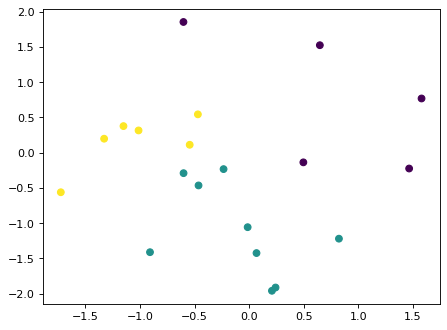

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 80

def make_dataset(num_samples, num_classes, num_features, random_seed = None):
    if random_seed is not None:
        np.random.seed(random_seed)
    X = np.random.randn(num_samples,num_features)
    Wstar = np.random.randn(num_features,num_classes)      # ground truth classifier
    y = np.argmax(X@Wstar,axis=1)     # labels
    return X, y

num_samples = 20
num_classes = 3
num_features = 2
X,y = make_dataset(num_samples,num_classes,num_features,42)
plt.scatter(X[:,0],X[:,1],c = y)

## One MSVM, two parametrization

We have the class score-based parametrization and the relative margin-based parametrization

In [33]:
import msvmpy.hard_margin as hard_margin
import time

start_time = time.time()
Wscore,_ = hard_margin.FnormA_du_score(X,y,num_classes)
end_time = time.time()
execution_time = end_time - start_time
print("class-score: ", execution_time)

start_time = time.time()
Wrmarg,dual_vars = hard_margin.FnormA_du_rmarg(X,y,num_classes)
end_time = time.time()
execution_time = end_time - start_time
print("relative margin: ", execution_time)

class-score:  0.002750396728515625
relative margin:  0.0020530223846435547


## Verify that the solutions are the same

In [16]:
np.linalg.norm(Wscore - Wrmarg)

3.42215923821673e-13

In [17]:
def plot_line(w,b=0,**kwargs):
    # plot the set of points v = [x,y] in R^2 such that
    # w@v = b
    # w[0]*x + w[1]*y= b
    # y = x*(-w[0]/w[1])+b/w[1]
    ax = plt.gca()
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    xs = np.linspace(xlims[0],xlims[1])
    ys = -xs*(w[0]/w[1])+b/w[1]
    ax.plot(xs,ys,**kwargs)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    return None

def plot_bdry(w):
    plot_line(w[:,0] - w[:,1], linestyle=':', c= 'k')
    plot_line(w[:,0] - w[:,2], linestyle=':', c= 'k')
    plot_line(w[:,1] - w[:,2], linestyle=':', c= 'k')
    return None

### Plot the dual variables

/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


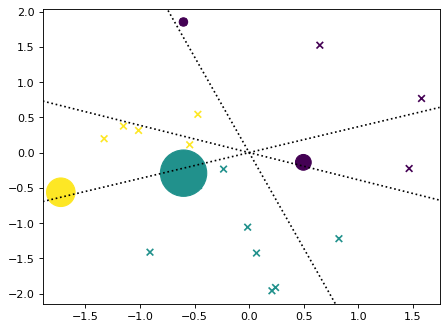

In [18]:
plt.scatter(X[:,0],X[:,1],c = y,marker='x')
plt.scatter(X[:,0],X[:,1],c = y, s = 10*np.sum(dual_vars,axis=1))
plot_bdry(Wrmarg)

## Example with two classes

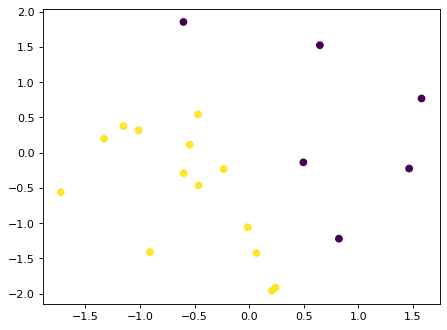

In [19]:

num_samples = 20
num_classes = 2
num_features = 2
X,y = make_dataset(num_samples,num_classes,num_features,42)
plt.scatter(X[:,0],X[:,1],c = y)

In [20]:
import msvmpy.hard_margin as hard_margin
import time

start_time = time.time()
Wscore,_ = hard_margin.FnormA_du_score(X,y,num_classes)
end_time = time.time()
execution_time = end_time - start_time
print("class-score: ", execution_time)

start_time = time.time()
Wrmarg,dual_vars = hard_margin.FnormA_du_rmarg(X,y,num_classes)
end_time = time.time()
execution_time = end_time - start_time
print("relative margin: ", execution_time)

class-score:  0.001935720443725586
relative margin:  0.0016427040100097656


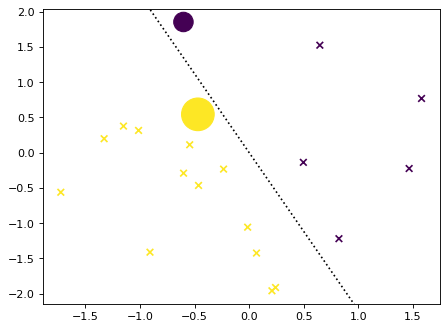

In [21]:
plt.scatter(X[:,0],X[:,1],c = y,marker='x')
plt.scatter(X[:,0],X[:,1],c = y, s = 100*np.sum(dual_vars,axis=1))
plot_line(Wrmarg[:,1],linestyle=":", c='k')